https://doordash.engineering/2020/09/18/causal-modeling-to-get-more-value-from-flat-experiment-results/comment-page-1/?unapproved=16&moderation-hash=7fa9a26e6386c27d25dbca6d1c777441#comments



One Model Approach, TMA: XGBoost </br>

Meta-Learns: X-Regressors </br>

Class transformation Apporach: TOT "Y* = Y(W-P)/P(1-P" </br>

𝑈𝑝𝑙𝑖𝑓𝑡 𝐿𝐺𝑊𝑈𝑀 = P(TR)/P(T) + P(CN)/P(C) - P(TN)/P(T) - P(CR)/P(C) </br>
https://www.kaggle.com/viswanathgang/criteo-uplift-modelling-viswanath/edit?rvi=1


PyLift package </br>


Report numbers at bigger samples </br>


Extreme predicted Negative uplift has postivie observed uplift </br>



In [93]:
import pandas as pd


from pylift import TransformedOutcome
import numpy as np

from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import math



import matplotlib.pyplot as plt
import subprocess
import sys

from pylift import TransformedOutcome
from pylift.eval import UpliftEval
import random
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
from collections import Counter

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics.cluster import contingency_matrix
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [4]:
df = pd.read_csv('/Users/viswanath.g/Downloads/criteo-uplift-v2.1.csv')

In [5]:
print(df.agg({'treatment':['mean'], 'visit':['mean'], 'conversion':['mean']}))
print(df.groupby(['treatment']).agg({'conversion':['mean'], 'visit':['mean'], }))
print(df.groupby(['treatment', 'exposure']).agg({'conversion':['mean', 'count'], 'visit':['mean', 'count'], }))

      treatment     visit  conversion
mean       0.85  0.046992    0.002917
          conversion     visit
                mean      mean
treatment                     
0           0.001938  0.038201
1           0.003089  0.048543
                   conversion               visit          
                         mean     count      mean     count
treatment exposure                                         
0         0          0.001938   2096937  0.038201   2096937
1         0          0.001194  11454443  0.034861  11454443
          1          0.053784    428212  0.414538    428212


##### Two Model Approach

q2_aqini:  0.09 q2_aqini:  0.107 q2_cgains:  0.088


<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

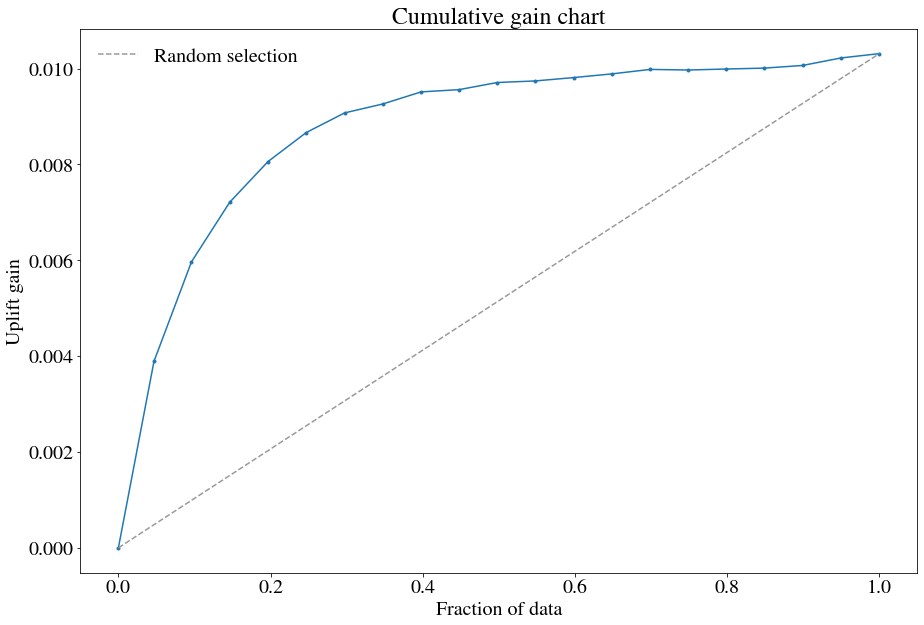

In [27]:
# Incremental Effect of Intervention on Visit

df_sample = df.sample(frac =.2) 
df_sample.drop(['conversion', 'exposure'], inplace=True, axis=1)

train_df = df_sample.sample(frac = 0.5)
test_df  = df_sample.drop(train_df.index)

treated_data    = train_df[train_df.treatment == True ]
control_data    = train_df[train_df.treatment == False] 

P_T = GradientBoostingClassifier().fit(treated_data.drop(['visit', 'treatment'], axis=1), treated_data['visit'] )
P_C = GradientBoostingClassifier().fit(control_data.drop(['visit', 'treatment'], axis=1), control_data['visit'] )

test_data_val_pred    = P_T.predict_proba( test_df.drop(['visit', 'treatment'], axis=1) ) 
control_data_val_pred = P_C.predict_proba( test_df.drop(['visit', 'treatment'], axis=1) )

test_df['uplift'] = ( test_data_val_pred[:,1] - control_data_val_pred[:,1] ) 
upev = UpliftEval(test_df.treatment, test_df.visit, test_df.uplift)

print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))

upev.plot(plot_type='cgains')

In [ ]:
treatment, exposure
conversion, visist

q2_aqini:  0.077 q2_aqini:  0.093 q2_cgains:  0.074


<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

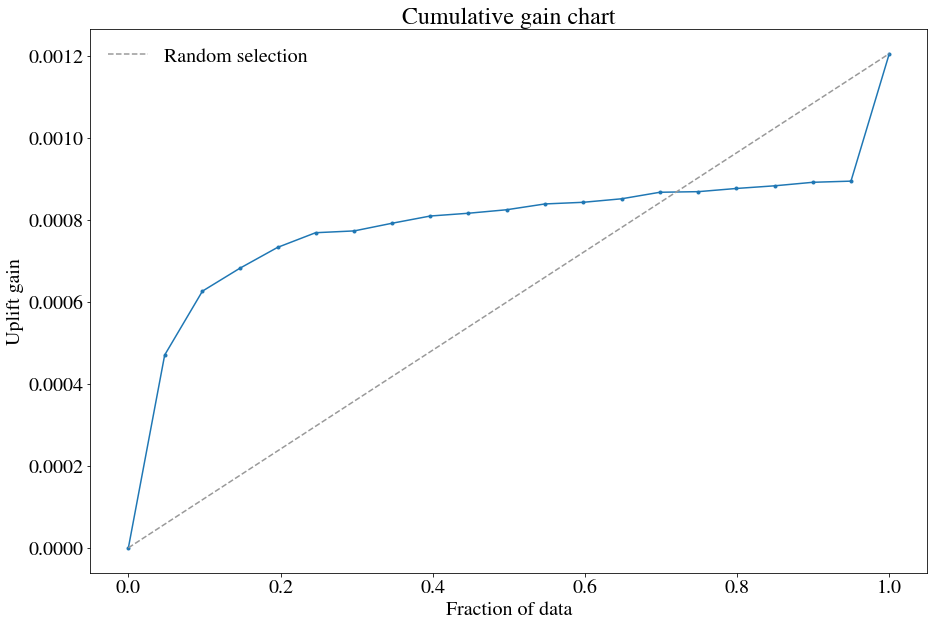

In [66]:
df_sample = df.sample(frac =.2) 
df_sample.drop(['visit', 'exposure'], inplace=True, axis=1)

train_df = df_sample.sample(frac = 0.5)
test_df  = df_sample.drop(train_df.index)

treated_data    = train_df[train_df.treatment == True ]
control_data    = train_df[train_df.treatment == False] 

P_T = GradientBoostingClassifier().fit(treated_data.drop(['conversion', 'treatment'], axis=1), treated_data['conversion'] )
P_C = GradientBoostingClassifier().fit(control_data.drop(['conversion', 'treatment'], axis=1), control_data['conversion'] )

test_data_val_pred    = P_T.predict_proba( test_df.drop(['conversion', 'treatment'], axis=1) )
control_data_val_pred = P_C.predict_proba( test_df.drop(['conversion', 'treatment'], axis=1) )

test_df['uplift'] = ( test_data_val_pred[:,1] - control_data_val_pred[:,1] ) 
upev = UpliftEval(test_df.treatment, test_df.conversion, test_df.uplift)

print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))

upev.plot(plot_type='cgains')

##### One Model Approach

q2_aqini:  0.083 q2_aqini:  0.107 q2_cgains:  0.08


<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

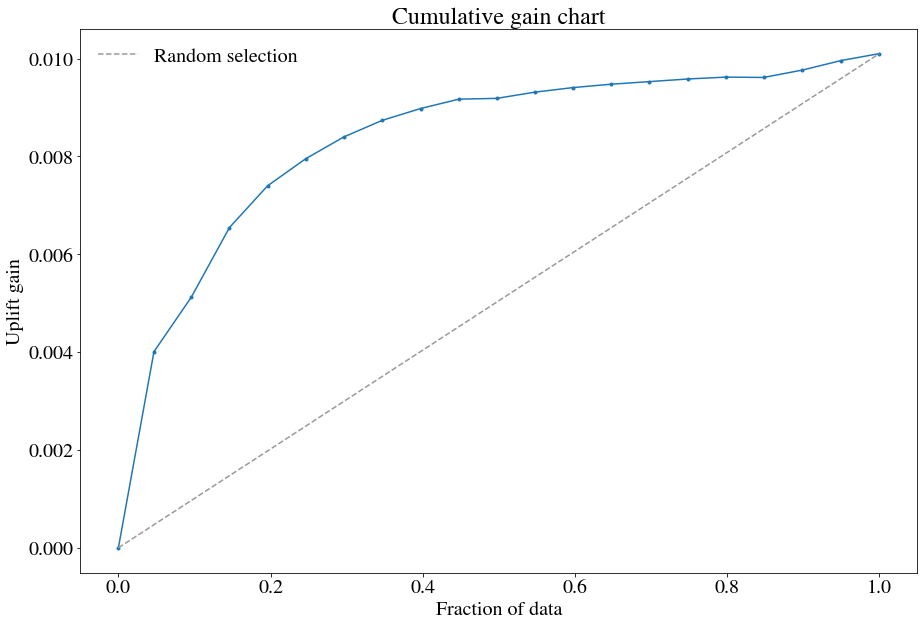

In [61]:
df_sample = df.sample(frac =.2) 
df_sample.drop(['conversion', 'exposure'], inplace=True, axis=1)
df_sample['treatment_mod'] = df_sample['treatment']

train_df = df_sample.sample(frac = 0.5)
test_df  = df_sample.drop(train_df.index)

propModel = GradientBoostingClassifier().fit(train_df.drop(['visit','treatment'], axis=1), train_df['visit'] )


test_df['treatment_mod'] = 1
test_data_val_pred    = propModel.predict_proba( test_df.drop(['visit', 'treatment'], axis=1) )
test_df['treatment_mod'] = 0
control_data_val_pred = propModel.predict_proba( test_df.drop(['visit', 'treatment'], axis=1) )

test_df['uplift'] = ( test_data_val_pred[:,1] - control_data_val_pred[:,1] ) 
upev = UpliftEval(test_df.treatment, test_df.visit, test_df.uplift)

print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_aqini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))

upev.plot(plot_type='cgains')


q2_aqini:  0.041 q2_aqini:  0.042 q2_cgains:  0.041


<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

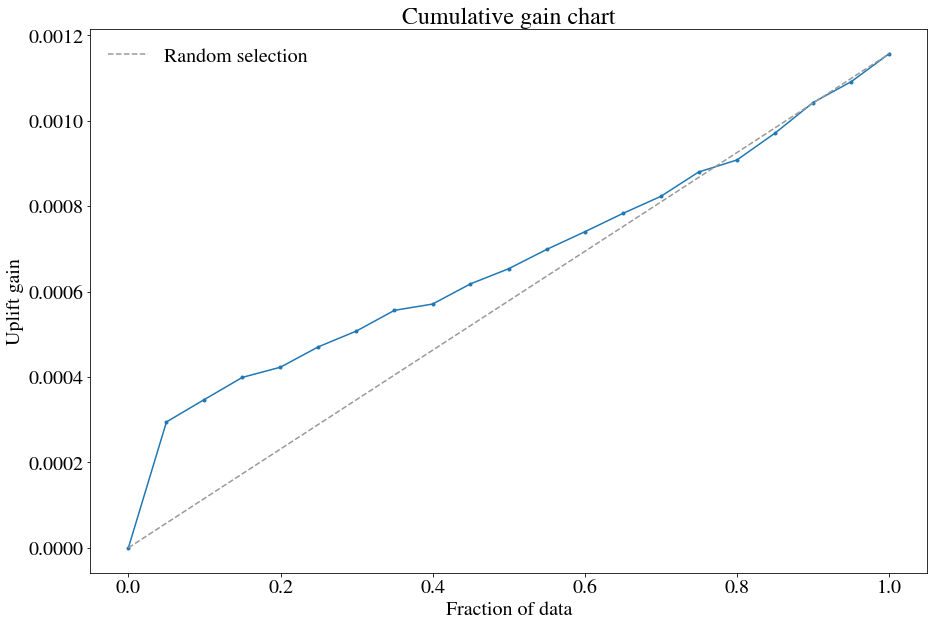

In [108]:
df_sample = df.sample(frac =.2) 
df_sample.drop(['visit', 'exposure'], inplace=True, axis=1)
df_sample['treatment_mod'] = df_sample['treatment']

train_df = df_sample.sample(frac = 0.5)
test_df  = df_sample.drop(train_df.index)

propModel = GradientBoostingClassifier().fit(train_df.drop(['conversion','treatment'], axis=1), train_df['conversion'] )

test_df['treatment_mod'] = 1
test_data_val_pred    = propModel.predict_proba( test_df.drop(['conversion', 'treatment'], axis=1) )
test_df['treatment_mod'] = 0
control_data_val_pred = propModel.predict_proba( test_df.drop(['conversion', 'treatment'], axis=1) )

test_df['uplift'] = ( test_data_val_pred[:,1] - control_data_val_pred[:,1] ) 
upev = UpliftEval(test_df.treatment, test_df.conversion, test_df.uplift)

print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_aqini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))

upev.plot(plot_type='cgains')


##### Class Transformation Approach

Propensity Score Model is Built
q2_aqini:  0.088 q2_aqini:  0.109 q2_cgains:  0.086


<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

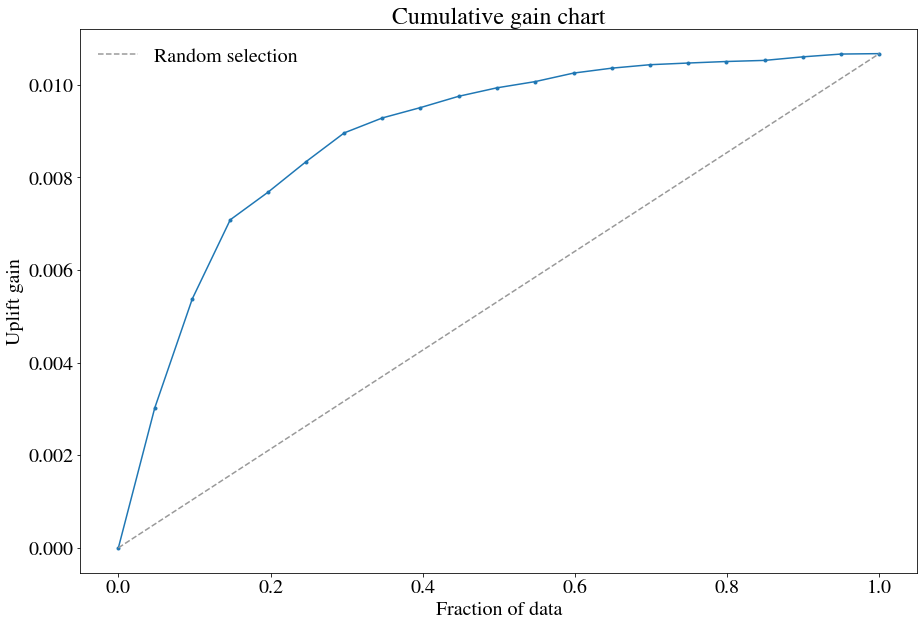

In [111]:
df_sample = df.sample(frac =.2) 

propToTreatModel = GradientBoostingClassifier().fit(
                        df_sample.drop(['treatment', 'conversion', 'visit', 'exposure'], axis=1), 
                        df_sample['treatment'] 
                )

propensityScore = propToTreatModel.predict_proba(df_sample.drop(['treatment', 'conversion', 'visit', 'exposure'], axis=1))
df_sample['ps'] = np.where(df_sample['treatment'] == 1, propensityScore[:,1], propensityScore[:,0])
print('Propensity Score Model is Built')

df_sample['y_mod']  = ( 
                        df_sample['visit'] * ( df_sample['treatment'] - df_sample['ps']) 
                                   / 
                       ( df_sample['ps'] * ( 1-df_sample['ps'] ) )
                      )

train_df = df_sample.sample(frac = 0.5)
test_df  = df_sample.drop(train_df.index)

cateModel = GradientBoostingRegressor().fit(train_df.drop(['treatment', 'conversion', 'visit', 'exposure',
        'ps', 'y_mod'], axis=1), train_df['y_mod'] )

test_df['uplift'] = cateModel.predict( test_df.drop(['treatment', 'conversion', 'visit', 'exposure',
       'ps', 'y_mod'], axis=1) )


upev = UpliftEval(test_df.treatment, test_df.visit, test_df.uplift)

print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_aqini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))

upev.plot(plot_type='cgains')


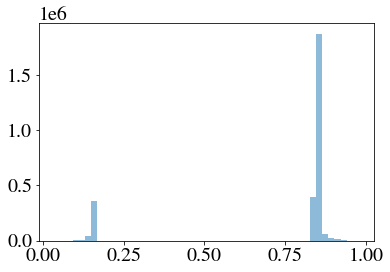

In [123]:
# propensity score distribution
_ = plt.hist(df_sample['ps'], bins=50, alpha=0.5)
# below distributions clearly tells us that the data generates by RCT

##### X-Regressor

In [ ]:
# T_X
# C_X
# DT_X
# DC_X
# cate


df_sample = df.sample(frac =.01) 
df_sample.drop(['conversion', 'exposure'], inplace=True, axis=1)

train_df = df_sample.sample(frac = 0.5)
test_df  = df_sample.drop(train_df.index)

treated_data    = train_df[train_df.treatment == True ]
control_data    = train_df[train_df.treatment == False] 

T_X = GradientBoostingClassifier().fit(treated_data.drop(['visit', 'treatment'], axis=1), treated_data['visit'] )
C_X = GradientBoostingClassifier().fit(control_data.drop(['visit', 'treatment'], axis=1), control_data['visit'] )
